In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly
import plotly.express as px
import plotly.graph_objects as go
import xlrd
import sklearn as sk
from sklearn.svm import SVR
#from sklearn.metrics import confusion_matrix, regression, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from collections import Counter
import math
import random
import time
import operator
import datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df = pd.read_excel('Main.xlsx')

In [5]:
df['Median_age'] = 0
df['Population_Density'] = 0
df['Land_area'] = 0
df['Insurance_cost'] = 0
df['Hospitals'] = 0
df['Pneumonia'] = 0
df['Physical_activity'] = 0
df['Overweight'] = 0
df['Hypertension'] = 0
df['Heart_Deasese'] = 0
df['Diabets'] = 0
df['Chronic_Lung'] = 0
df['Cancer'] = 0
df

,Date,state,Lat,Long,positive,negative,recovered,deaths,Median_age,Population_Density,...,Hospitals,Pneumonia,Physical_activity,Overweight,Hypertension,Heart_Deasese,Diabets,Chronic_Lung,Cancer,active
0,2020-01-22,Alabama,32.539527,-86.644082,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,Alabama,32.539527,-86.644082,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,Alabama,32.539527,-86.644082,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,Alabama,32.539527,-86.644082,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,Alabama,32.539527,-86.644082,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6370,2020-05-21,Wyoming,41.654987,-105.723541,787,18053.0,534,11,0,0,...,0,0,0,0,0,0,0,0,0,242
6371,2020-05-22,Wyoming,41.654987,-105.723541,803,18621.0,551,12,0,0,...,0,0,0,0,0,0,0,0,0,240
6372,2020-05-23,Wyoming,41.654987,-105.723541,813,19221.0,551,12,0,0,...,0,0,0,0,0,0,0,0,0,250
6373,2020-05-24,Wyoming,41.654987,-105.723541,813,19221.0,556,12,0,0,...,0,0,0,0,0,0,0,0,0,245


In [6]:
len(df['Province/State'].unique())

KeyError: 'Province/State'

In [ ]:
table = pd.read_excel('Common_Table_Deases.xlsx')

In [ ]:
len(table['State'].unique())

In [ ]:
states = table['State'].tolist()

In [ ]:
states

In [ ]:
for i in range(51):
    states[i] = states[i].replace(' ', '')
    states[i] = states[i].replace('WashDC', 'District of Columbia')
    states[i] = states[i].replace('NewHampshire', 'New Hampshire')
    states[i] = states[i].replace('NewJersey', 'New Jersey')
    states[i] = states[i].replace('NewMexico', 'New Mexico')
    states[i] = states[i].replace('NewYork', 'New York')
    states[i] = states[i].replace('NorthCarolina', 'North Carolina')
    states[i] = states[i].replace('RhodeIsland', 'Rhode Island')
    states[i] = states[i].replace('SouthCarolina', 'South Carolina')
    states[i] = states[i].replace('SouthDakota', 'South Dakota')
    states[i] = states[i].replace('WestVirginia', 'West Virginia')
    states[i] = states[i].replace('NorthDakota', 'North Dakota')

In [ ]:
states

In [ ]:
table = pd.read_excel('Common_Table_Deases.xlsx')

In [ ]:
states = table['State'].tolist()

In [ ]:
pneumonia = table['Pneumonia'].tolist()
activity = table[' Physcial activity'].tolist()
overweight = table[' Overweight'].tolist()
hyper = table[' Hypertension'].tolist()
heart = table[' Heart_Deasese'].tolist()
diabets = table[' Diabets'].tolist()
lung = table[' Chronic_Lung'].tolist()
canser = table[' Canser'].tolist()

In [ ]:
for i in range(51):
    activity[i] = activity[i].replace(' %', '').replace(',', '.')
    activity[i] = float(activity[i])
activity

In [ ]:
for i in range(51):
    overweight[i] = overweight[i].replace(' %', '').replace(',', '.')
    overweight[i] = float(overweight[i])
overweight

In [ ]:
for i in range(51):
    df.loc[df["Province/State"] == states[i], "Pneumonia"] = pneumonia[i]
    df.loc[df["Province/State"] == states[i], "Physical_activity"] = activity[i]
    df.loc[df["Province/State"] == states[i], "Overweight"] = overweight[i]
    df.loc[df["Province/State"] == states[i], "Hypertension"] = hyper[i]
    df.loc[df["Province/State"] == states[i], "Heart_Deasese"] = heart[i]
    df.loc[df["Province/State"] == states[i], "Diabets"] = diabets[i]
    df.loc[df["Province/State"] == states[i], "Chronic_Lung"] = lung[i]
    df.loc[df["Province/State"] == states[i], "Cancer"] = canser[i]

In [ ]:
df

In [ ]:
median = pd.read_csv('median_age_states.csv', sep = ',')

In [ ]:
for i in range(51):
    df.loc[df["Province/State"] == states[i], "Province/State"] = i

In [ ]:
df['active'] = df['positive'] - df['deaths'] - df['recovered']

In [ ]:
df

In [ ]:
for i in range(51):
    df.loc[df["Province/State"] == i, "Province/State"] = states[i]

In [ ]:
df


In [ ]:
df.rename(columns={'State': 'state'}, inplace=True)
df

In [7]:
median_age = median['  Median age in years (Total Population)'].tolist()
states2 = median['  State'].tolist()

NameError: name 'median' is not defined

In [8]:
for i in range(56):
    df.loc[df["state"] == states2[i], "Median_age"] = median_age[i]
df

NameError: name 'median_age' is not defined

In [9]:
population = pd.read_excel('Version-2.xlsx')
population

,Unnamed: 0,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,Insurance_cost(montly cost in $),Number_of_hospitals,Pneumonia,Physcial activity,Overweight,Hypertension,Heart_Deasese,Diabets,Chronic_Lung,Canser
0,NaN,AL,8898.0,106275.0,NaN,NaN,1178.0,NaN,448.0,NaN,...,488.0,125,20.2,68.0 %,70.2 %,9.12,223.18,19.75,57.78,170.02
1,NaN,AL,8581.0,100935.0,NaN,NaN,1158.0,NaN,442.0,NaN,...,488.0,125,20.2,68.0 %,70.2 %,9.12,223.18,19.75,57.78,170.02
2,NaN,AL,8285.0,98481.0,NaN,NaN,1107.0,NaN,428.0,NaN,...,488.0,125,20.2,68.0 %,70.2 %,9.12,223.18,19.75,57.78,170.02
3,NaN,AL,8025.0,95092.0,NaN,NaN,1064.0,NaN,411.0,NaN,...,488.0,125,20.2,68.0 %,70.2 %,9.12,223.18,19.75,57.78,170.02
4,NaN,AL,7725.0,84775.0,NaN,NaN,1035.0,NaN,403.0,NaN,...,488.0,125,20.2,68.0 %,70.2 %,9.12,223.18,19.75,57.78,170.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,NaN,MP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3541,NaN,MP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3542,NaN,MP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3543,NaN,MP,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
population.drop(columns = ['Unnamed: 0', 'positive', 'negative', 'pending', 'hospitalizedCurrently','hospitalizedCumulative','inIcuCurrently','onVentilatorCurrently'])

,state,inIcuCumulative,onVentilatorCumulative,recovered,Full_name,dateChecked,death,hospitalized,total,totalTestResults,...,Insurance_cost(montly cost in $),Number_of_hospitals,Pneumonia,Physcial activity,Overweight,Hypertension,Heart_Deasese,Diabets,Chronic_Lung,Canser
0,AL,448.0,266.0,NaN,Alabama,2020-05-07T20:00:00Z,349.0,1178.0,115173,115173,...,488.0,125,20.2,68.0 %,70.2 %,9.12,223.18,19.75,57.78,170.02
1,AL,442.0,264.0,NaN,Alabama,2020-05-06T20:00:00Z,340.0,1158.0,109516,109516,...,488.0,125,20.2,68.0 %,70.2 %,9.12,223.18,19.75,57.78,170.02
2,AL,428.0,255.0,NaN,Alabama,2020-05-05T20:00:00Z,313.0,1107.0,106766,106766,...,488.0,125,20.2,68.0 %,70.2 %,9.12,223.18,19.75,57.78,170.02
3,AL,411.0,247.0,NaN,Alabama,2020-05-04T20:00:00Z,296.0,1064.0,103117,103117,...,488.0,125,20.2,68.0 %,70.2 %,9.12,223.18,19.75,57.78,170.02
4,AL,403.0,242.0,NaN,Alabama,2020-05-03T20:00:00Z,290.0,1035.0,92500,92500,...,488.0,125,20.2,68.0 %,70.2 %,9.12,223.18,19.75,57.78,170.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,MP,NaN,NaN,NaN,NaN,2020-03-20T20:00:00Z,0.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3541,MP,NaN,NaN,NaN,NaN,2020-03-19T20:00:00Z,0.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3542,MP,NaN,NaN,NaN,NaN,2020-03-18T20:00:00Z,0.0,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3543,MP,NaN,NaN,NaN,NaN,2020-03-17T20:00:00Z,NaN,NaN,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
population = population.drop(columns = ['inIcuCumulative', 'onVentilatorCumulative', 'recovered', 'dateChecked', 'death','hospitalized','total','totalTestResults', 'Unnamed: 0', 'positive', 'negative', 'pending', 'hospitalizedCurrently','hospitalizedCumulative','inIcuCurrently','onVentilatorCurrently', 'posNeg', 'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease', 'positiveIncrease','totalTestResultsIncrease', 'Media_age', 'Pneumonia', ' Physcial activity', ' Overweight', ' Hypertension', ' Heart_Deasese', ' Diabets', ' Chronic_Lung', ' Canser'])

In [12]:
population

,state,Full_name,fips,Lat,Long,Population_density per km2,Land_Area km2,State emergency declared,Stay at home ordered,Out-of-state travel restrictions,Schools,Daycares,Bars&restaurants,Non-essential retail,Date_opening,Insurance_cost(montly cost in $),Number_of_hospitals
0,AL,Alabama,1,32.3182,-86.9023,37.0,131 169,2020-03-13,2020-04-04 00:00:00,0.0,1.0,1.0,1.0,1.0,NaN,488.0,125
1,AL,Alabama,1,32.3182,-86.9023,37.0,131 169,2020-03-13,2020-04-04 00:00:00,0.0,1.0,1.0,1.0,1.0,NaN,488.0,125
2,AL,Alabama,1,32.3182,-86.9023,37.0,131 169,2020-03-13,2020-04-04 00:00:00,0.0,1.0,1.0,1.0,1.0,NaN,488.0,125
3,AL,Alabama,1,32.3182,-86.9023,37.0,131 169,2020-03-13,2020-04-04 00:00:00,0.0,1.0,1.0,1.0,1.0,NaN,488.0,125
4,AL,Alabama,1,32.3182,-86.9023,37.0,131 169,2020-03-13,2020-04-04 00:00:00,0.0,1.0,1.0,1.0,1.0,NaN,488.0,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,MP,NaN,69,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3541,MP,NaN,69,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3542,MP,NaN,69,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3543,MP,NaN,69,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
population = population.drop(columns = ['Lat', 'Long', 'State emergency declared', 'Stay at home ordered', 'Date_opening'])

In [14]:
population

,state,Full_name,fips,Population_density per km2,Land_Area km2,Out-of-state travel restrictions,Schools,Daycares,Bars&restaurants,Non-essential retail,Insurance_cost(montly cost in $),Number_of_hospitals
0,AL,Alabama,1,37.0,131 169,0.0,1.0,1.0,1.0,1.0,488.0,125
1,AL,Alabama,1,37.0,131 169,0.0,1.0,1.0,1.0,1.0,488.0,125
2,AL,Alabama,1,37.0,131 169,0.0,1.0,1.0,1.0,1.0,488.0,125
3,AL,Alabama,1,37.0,131 169,0.0,1.0,1.0,1.0,1.0,488.0,125
4,AL,Alabama,1,37.0,131 169,0.0,1.0,1.0,1.0,1.0,488.0,125
...,...,...,...,...,...,...,...,...,...,...,...,...
3540,MP,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3541,MP,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3542,MP,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3543,MP,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
population = population.drop_duplicates(subset=['state'], keep='first')

In [16]:
population

,state,Full_name,fips,Population_density per km2,Land_Area km2,Out-of-state travel restrictions,Schools,Daycares,Bars&restaurants,Non-essential retail,Insurance_cost(montly cost in $),Number_of_hospitals
0,AL,Alabama,1,37.0,131 169,0.0,1.0,1.0,1.0,1.0,488.0,125
62,AK,Alaska,2,1.0,1447953,2.0,1.0,1.0,1.0,1.0,614.0,28
125,AS,American Samoa,60,279.0,199,2.0,1.0,1.0,0.0,0.0,NaN,1
178,AZ,Arizona,4,23.0,294207,1.0,1.0,1.0,1.0,1.0,487.0,124
243,AR,Arkansas,5,22.0,134770,0.0,1.0,1.0,1.0,1.0,405.0,109
306,CA,California,6,97.0,403932,0.0,1.0,1.0,1.0,1.0,576.0,422
371,CO,Colorado,8,20.0,268431,0.0,1.0,1.0,1.0,1.0,390.0,114
435,CT,Connecticut,9,286.0,12540,1.0,1.0,1.0,1.0,1.0,356.0,51
497,DE,Delaware,10,187.0,5047,2.0,1.0,1.0,1.0,1.0,475.0,17
560,DC,District of Columbia,11,4251.0,158,0.0,1.0,1.0,1.0,1.0,NaN,NaN


In [17]:
population = population.loc[~population['state'].isin(['MP'])]
states

NameError: name 'states' is not defined

In [ ]:
population = population.loc[~population['state'].isin(['AS', 'GU'])]

In [ ]:
df.info()

In [ ]:
states2 = population['Full_name'].tolist()
pop = population['Population_density per km2'].tolist()
area = population['Land_Area km2'].tolist()
insurance = population['Insurance_cost(montly cost in $)'].tolist()
hospitals = population['Number_of_hospitals'].tolist()

len(pop)
len(a)

In [ ]:
i = 0 
for i in range(len(states2)):
    df.loc[df["state"] == states2[i], "Population_Density"] = pop[i]
    df.loc[df["state"] == states2[i], "Hospitals"] = hospitals[i]
    df.loc[df["state"] == states2[i], "Land_area"] = area[i]
    df.loc[df["state"] == states2[i], "Insurance_cost"] = insurance[i]
df

In [ ]:
df.to_excel('Main.xlsx', engine='xlsxwriter', index = False) 

In [3]:
df = pd.read_excel('Main.xlsx')

In [4]:
df

,Date,state,Lat,Long,positive,negative,recovered,deaths,Median_age,Population_Density,...,Hospitals,Pneumonia,Physical_activity,Overweight,Hypertension,Heart_Deasese,Diabets,Chronic_Lung,Cancer,active
0,2020-01-22,Alabama,32.539527,-86.644082,0,0.0,0,0,39.2,37,...,125,20.20,68.0,70.2,9.12,223.18,19.75,57.78,170.02,0
1,2020-01-23,Alabama,32.539527,-86.644082,0,0.0,0,0,39.2,37,...,125,20.20,68.0,70.2,9.12,223.18,19.75,57.78,170.02,0
2,2020-01-24,Alabama,32.539527,-86.644082,0,0.0,0,0,39.2,37,...,125,20.20,68.0,70.2,9.12,223.18,19.75,57.78,170.02,0
3,2020-01-25,Alabama,32.539527,-86.644082,0,0.0,0,0,39.2,37,...,125,20.20,68.0,70.2,9.12,223.18,19.75,57.78,170.02,0
4,2020-01-26,Alabama,32.539527,-86.644082,0,0.0,0,0,39.2,37,...,125,20.20,68.0,70.2,9.12,223.18,19.75,57.78,170.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6370,2020-05-21,Wyoming,41.654987,-105.723541,787,18053.0,534,11,38.0,2,...,32,17.51,74.3,64.7,4.18,148.95,18.11,53.78,136.12,242
6371,2020-05-22,Wyoming,41.654987,-105.723541,803,18621.0,551,12,38.0,2,...,32,17.51,74.3,64.7,4.18,148.95,18.11,53.78,136.12,240
6372,2020-05-23,Wyoming,41.654987,-105.723541,813,19221.0,551,12,38.0,2,...,32,17.51,74.3,64.7,4.18,148.95,18.11,53.78,136.12,250
6373,2020-05-24,Wyoming,41.654987,-105.723541,813,19221.0,556,12,38.0,2,...,32,17.51,74.3,64.7,4.18,148.95,18.11,53.78,136.12,245


In [5]:
df = df.loc[~df['state'].isin(['California', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Massachusetts', 'Missouri', 'Nebraska', 'Ohio', 'Pennsylvania'])]
df

,Date,state,Lat,Long,positive,negative,recovered,deaths,Median_age,Population_Density,...,Hospitals,Pneumonia,Physical_activity,Overweight,Hypertension,Heart_Deasese,Diabets,Chronic_Lung,Cancer,active
0,2020-01-22,Alabama,32.539527,-86.644082,0,0.0,0,0,39.2,37,...,125,20.20,68.0,70.2,9.12,223.18,19.75,57.78,170.02,0
1,2020-01-23,Alabama,32.539527,-86.644082,0,0.0,0,0,39.2,37,...,125,20.20,68.0,70.2,9.12,223.18,19.75,57.78,170.02,0
2,2020-01-24,Alabama,32.539527,-86.644082,0,0.0,0,0,39.2,37,...,125,20.20,68.0,70.2,9.12,223.18,19.75,57.78,170.02,0
3,2020-01-25,Alabama,32.539527,-86.644082,0,0.0,0,0,39.2,37,...,125,20.20,68.0,70.2,9.12,223.18,19.75,57.78,170.02,0
4,2020-01-26,Alabama,32.539527,-86.644082,0,0.0,0,0,39.2,37,...,125,20.20,68.0,70.2,9.12,223.18,19.75,57.78,170.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6370,2020-05-21,Wyoming,41.654987,-105.723541,787,18053.0,534,11,38.0,2,...,32,17.51,74.3,64.7,4.18,148.95,18.11,53.78,136.12,242
6371,2020-05-22,Wyoming,41.654987,-105.723541,803,18621.0,551,12,38.0,2,...,32,17.51,74.3,64.7,4.18,148.95,18.11,53.78,136.12,240
6372,2020-05-23,Wyoming,41.654987,-105.723541,813,19221.0,551,12,38.0,2,...,32,17.51,74.3,64.7,4.18,148.95,18.11,53.78,136.12,250
6373,2020-05-24,Wyoming,41.654987,-105.723541,813,19221.0,556,12,38.0,2,...,32,17.51,74.3,64.7,4.18,148.95,18.11,53.78,136.12,245


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5125 entries, 0 to 6374
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5125 non-null   object 
 1   state               5125 non-null   object 
 2   Lat                 5125 non-null   float64
 3   Long                5125 non-null   float64
 4   positive            5125 non-null   int64  
 5   negative            5120 non-null   float64
 6   recovered           5125 non-null   int64  
 7   deaths              5125 non-null   int64  
 8   Median_age          5125 non-null   float64
 9   Population_Density  5125 non-null   int64  
 10  Land_area           5125 non-null   object 
 11  Insurance_cost      5125 non-null   int64  
 12  Hospitals           5125 non-null   object 
 13  Pneumonia           5125 non-null   float64
 14  Physical_activity   5125 non-null   float64
 15  Overweight          5125 non-null   float64
 16  Hypert

[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

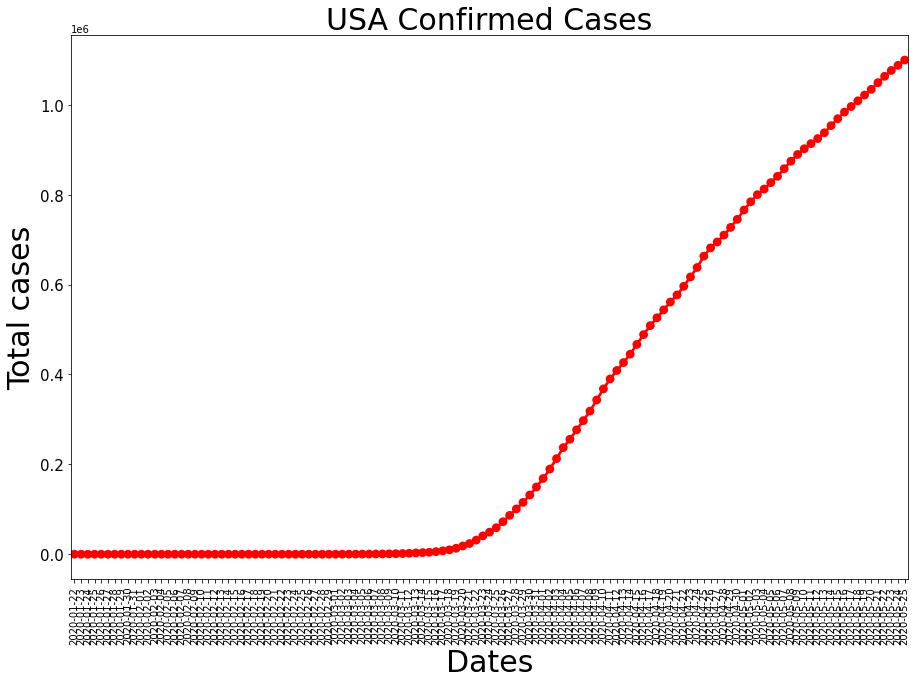

In [7]:
df.rename(columns={'Date': 'date'}, inplace=True)
plt.figure(figsize = (15,10))
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 15)
plt.xlabel('Date', fontsize = 30)
plt.ylabel('positive', fontsize = 30)
plt.title('USA Confirmed Cases', fontsize = 30)
total_cases = df.groupby('date')['date','positive', ].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x = total_cases.date.dt.date, y = total_cases.positive, color = 'r')
ax.set(xlabel='Dates', ylabel='Total cases')

In [8]:
top_actives = df.groupby(by = 'state')['active'].sum().sort_values(ascending=False).head(20).reset_index()

In [ ]:
plt.figure(figsize = (15, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Total cases', fontsize = 30)
plt.ylabel('State',fontsize = 30)
plt.title('Top 20 states having most active cases', fontsize = 30)
ax = sns.barplot(x = top_actives.active, y = top_actives.state)
for i, (value,name) in enumerate(zip(top_actives.active, top_actives.state)):
    ax.text(value, i-0.5, f'{value:,0f}', size = 10, ha = 'left', va='center')
ax.set(xlabel='Total cases', ylabel= 'State')

NameError: name 'top_actives' is not defined

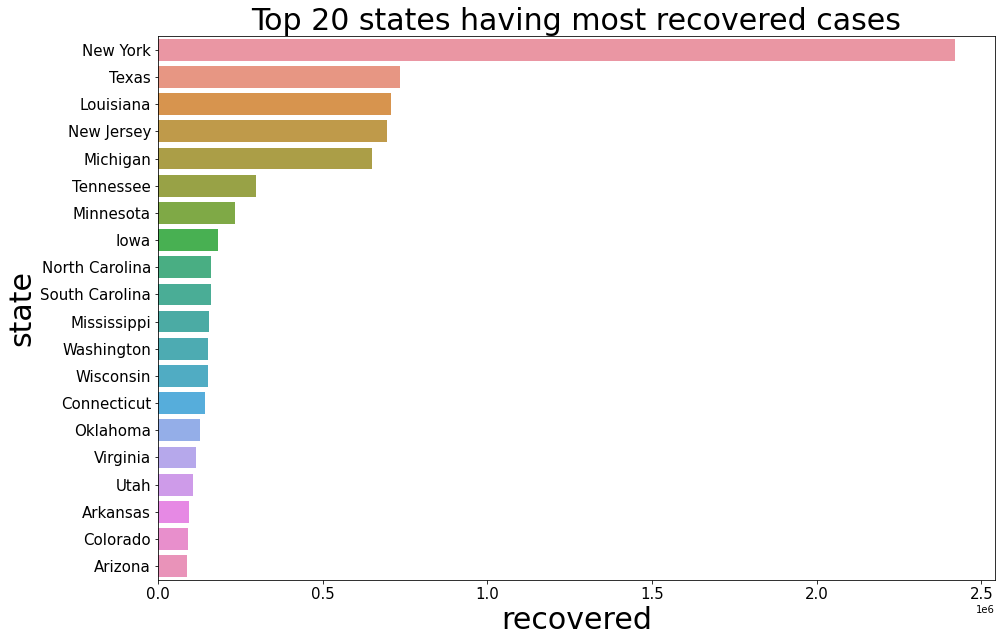

In [18]:
top_recovered = df.groupby(by = 'state')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()
plt.figure(figsize = (15, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Total cases', fontsize = 30)
plt.ylabel('State',fontsize = 30)
plt.title('Top 20 states having most recovered cases', fontsize = 30)
ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.state)
for i, (value,name) in enumerate(zip(top_actives.recovered, top_actives.state)):
    ax.text(value, i-0.5, f'{value:,0f}', size = 10, ha = 'left', va='center')
ax.set(xlabel='Total cases', ylabel= 'State')

In [9]:
from fbprophet import Prophet 

In [19]:
positive = df.groupby("date").sum()["positive"].reset_index()
positive_d = df.groupby("date").sum()["deaths"].reset_index()
positive_r = df.groupby("date").sum()["recovered"].reset_index()
positive.columns = ["ds", "y"]
positive["ds"] = pd.to_datetime(positive["ds"])

In [20]:
model = Prophet(interval_width=0.95)
model.fit(positive)
future = model.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
127,2020-05-28
128,2020-05-29
129,2020-05-30
130,2020-05-31
131,2020-06-01


In [21]:
forecast = model.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
127,2020-05-28,1.148517e+06,1.142614e+06,1.154613e+06
128,2020-05-29,1.163644e+06,1.154683e+06,1.172775e+06
129,2020-05-30,1.178507e+06,1.167288e+06,1.191019e+06
130,2020-05-31,1.191895e+06,1.175181e+06,1.208455e+06
131,2020-06-01,1.204725e+06,1.183156e+06,1.224778e+06


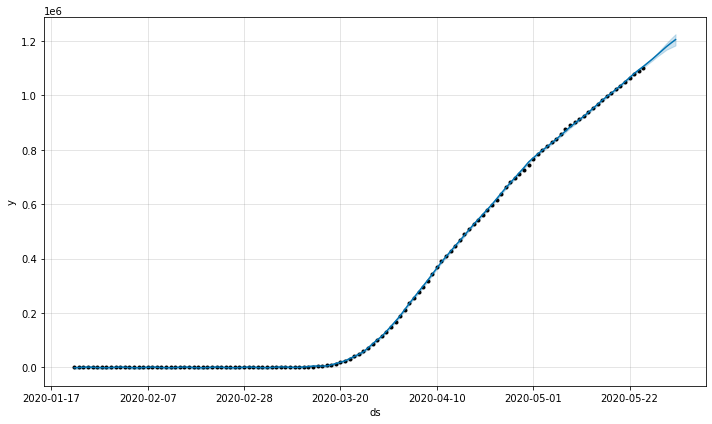

In [22]:
confirmed_forecast_plot = model.plot(forecast)

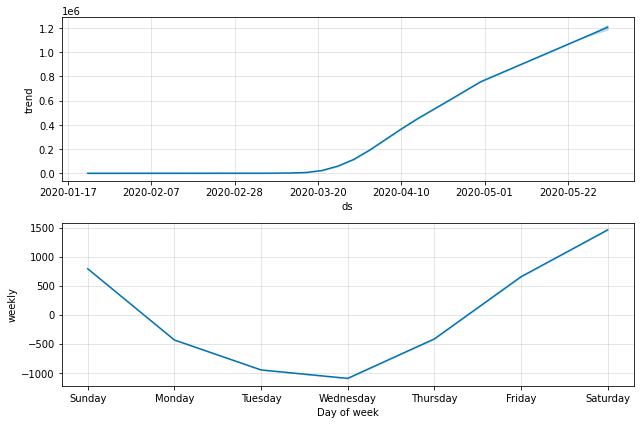

In [23]:
confirmed_forecast_plot = model.plot_components(forecast)